# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split

In [2]:
base = pd.read_csv('../novabase.csv')
base.head()

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,sexo_M,posse_de_veiculo_Y,posse_de_imovel_Y
0,0,58.832877,3.106849,1,0,0,0,2.0,False,True,True,True
1,0,52.356164,8.358904,1,0,1,1,1.0,False,False,False,True
2,0,52.356164,8.358904,1,0,1,1,1.0,False,False,False,True
3,0,46.224658,2.106849,1,1,1,1,2.0,False,True,True,True
4,0,29.230137,3.021918,1,0,0,0,2.0,False,False,True,False


In [3]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   qtd_filhos             16650 non-null  int64  
 1   idade                  16650 non-null  float64
 2   tempo_emprego          16650 non-null  float64
 3   possui_celular         16650 non-null  int64  
 4   possui_fone_comercial  16650 non-null  int64  
 5   possui_fone            16650 non-null  int64  
 6   possui_email           16650 non-null  int64  
 7   qt_pessoas_residencia  16650 non-null  float64
 8   mau                    16650 non-null  bool   
 9   sexo_M                 16650 non-null  bool   
 10  posse_de_veiculo_Y     16650 non-null  bool   
 11  posse_de_imovel_Y      16650 non-null  bool   
dtypes: bool(4), float64(3), int64(5)
memory usage: 1.1 MB


In [4]:
base = base.drop_duplicates()
base.shape

(6753, 12)

In [5]:
base.tail()

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,sexo_M,posse_de_veiculo_Y,posse_de_imovel_Y
16644,1,34.857534,3.101370,1,1,1,0,1.0,True,False,False,True
16645,0,54.109589,9.884932,1,0,0,0,2.0,True,False,False,True
16646,0,43.389041,7.380822,1,1,1,0,2.0,True,False,False,True
16647,0,30.005479,9.800000,1,1,0,0,2.0,True,True,True,True
16649,0,33.936986,3.630137,1,0,1,1,2.0,True,False,False,True


In [6]:
base.reset_index(drop=True, inplace=True)
base.tail()

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,sexo_M,posse_de_veiculo_Y,posse_de_imovel_Y
6748,1,34.857534,3.101370,1,1,1,0,1.0,True,False,False,True
6749,0,54.109589,9.884932,1,0,0,0,2.0,True,False,False,True
6750,0,43.389041,7.380822,1,1,1,0,2.0,True,False,False,True
6751,0,30.005479,9.800000,1,1,0,0,2.0,True,True,True,True
6752,0,33.936986,3.630137,1,0,1,1,2.0,True,False,False,True


In [7]:
base.columns

Index(['qtd_filhos', 'idade', 'tempo_emprego', 'possui_celular',
       'possui_fone_comercial', 'possui_fone', 'possui_email',
       'qt_pessoas_residencia', 'mau', 'sexo_M', 'posse_de_veiculo_Y',
       'posse_de_imovel_Y'],
      dtype='object')

In [8]:
# criando variável target
y = base.mau

In [9]:
X = base.drop('mau', axis=1)

In [10]:
X.head()

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,sexo_M,posse_de_veiculo_Y,posse_de_imovel_Y
0,0,58.832877,3.106849,1,0,0,0,2.0,True,True,True
1,0,52.356164,8.358904,1,0,1,1,1.0,False,False,True
2,0,46.224658,2.106849,1,1,1,1,2.0,True,True,True
3,0,29.230137,3.021918,1,0,0,0,2.0,False,True,False
4,0,27.482192,4.024658,1,0,1,0,2.0,False,False,True


In [11]:
y

0       False
1       False
2       False
3       False
4       False
        ...  
6748     True
6749     True
6750     True
6751     True
6752     True
Name: mau, Length: 6753, dtype: bool

In [12]:
# criando a árvore com a base inteira
clf = DecisionTreeClassifier(random_state=100)

In [13]:
clf = DecisionTreeClassifier(random_state=100)
clf = clf.fit(X,y)

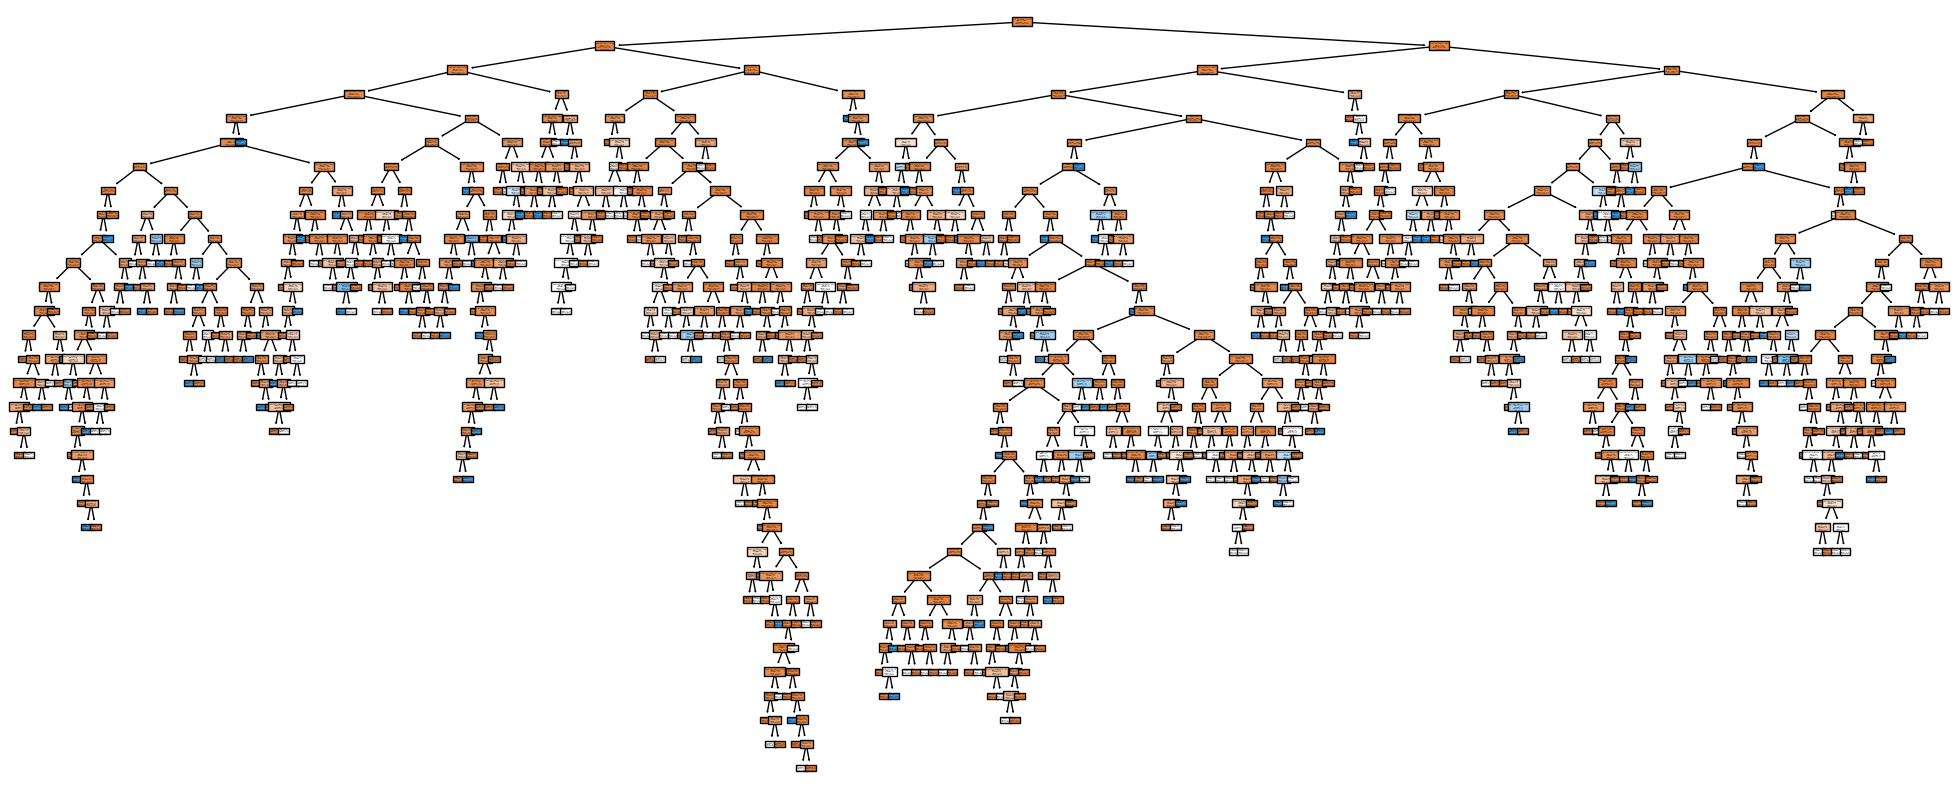

In [14]:
plt.figure(figsize=(25, 10))
plot_tree(clf,
          filled=True,
          class_names=['Mau', 'Bom'],
          feature_names=list(X.columns));

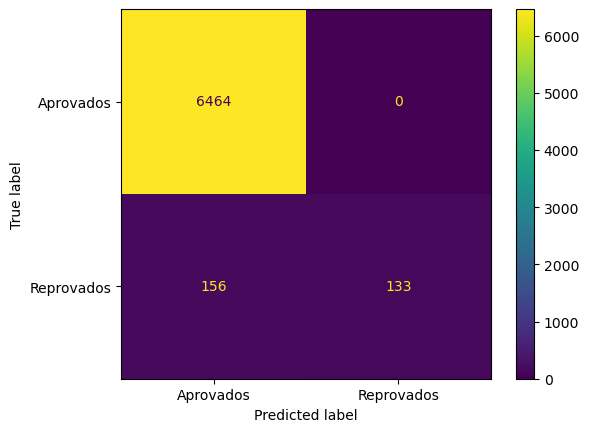

In [15]:
ConfusionMatrixDisplay.from_estimator(clf, X, y, display_labels=['Aprovados', 'Reprovados']);

In [16]:
y_chapeu = clf.predict(X)
accuracy_score(y, y_chapeu)

0.9768991559306974

Acurácia de 97,68%.

In [17]:
# separando a base em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [18]:
# 1
clf_t = DecisionTreeClassifier(random_state=100)

In [19]:
# 2
clf_t.fit(X_train,y_train)

DecisionTreeClassifier(random_state=100)

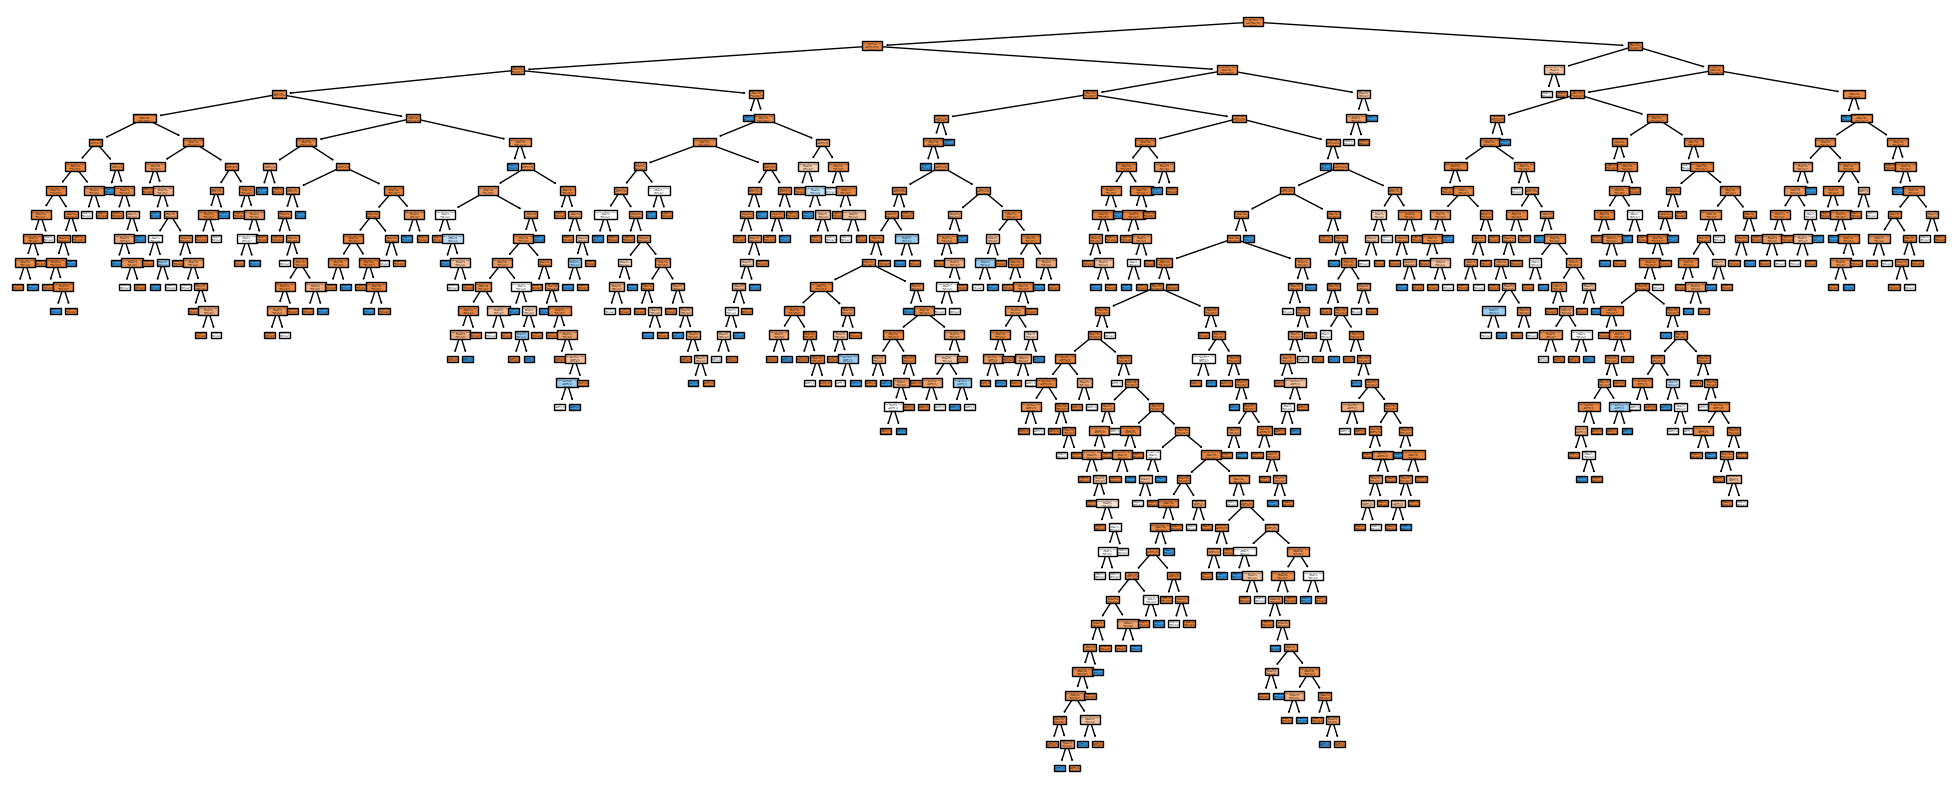

In [20]:
# 3 
plt.figure(figsize=(25, 10))
plot_tree(clf_t,
          filled=True,
          class_names=['Mau', 'Bom'],
          feature_names=list(X_train.columns));

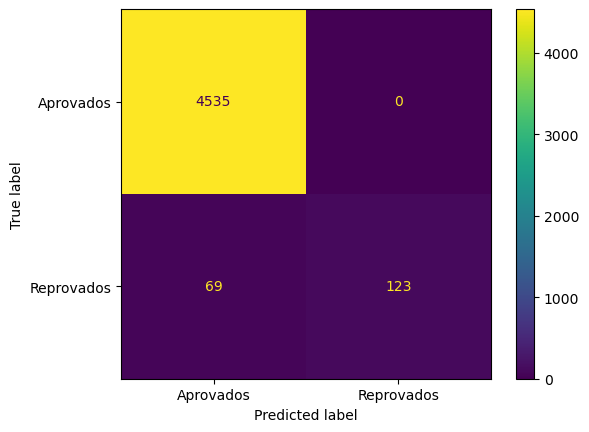

In [21]:
# 4
ConfusionMatrixDisplay.from_estimator(clf_t, X_train, y_train, display_labels=['Aprovados', 'Reprovados']);

In [22]:
# 5
y_chapeu_treino = clf_t.predict(X_train)
accuracy_score(y_train, y_chapeu_treino)

0.9854030040194627

A acurácia da base de treino é de 98,54%.

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [23]:
# 1
y_chapeu_teste = clf_t.predict(X_test)

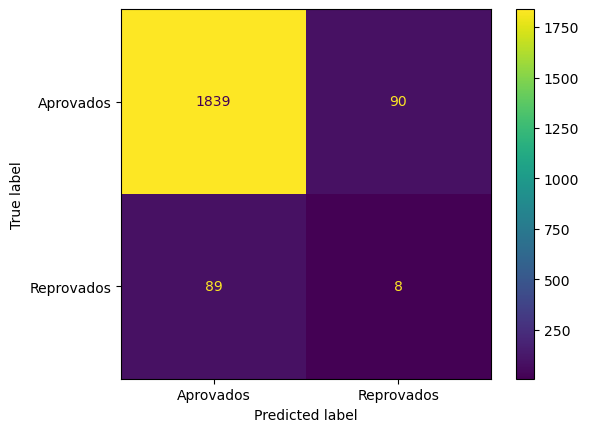

In [24]:
# 2
cm = confusion_matrix(y_test, y_chapeu_teste)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Aprovados', 'Reprovados'])
disp.plot()

In [25]:
# 3
print(f'Acurácia (Treino): {(accuracy_score(y_train, y_chapeu_treino)*100).round(2)}%')
print(f'Acurácia (Teste): {(accuracy_score(y_test, y_chapeu_teste)*100).round(2)}%')

Acurácia (Treino): 98.54%
Acurácia (Teste): 91.16%


Acurácia da base de teste é de 91,16%. Comparando a acurácia entre a base de treino e teste, esse modelo pode estar overfitado. A diferença ultrapassa 7%. Isso não é suficiente para declarar se o modelo está ou não overfitado, embora possa ser um indício. Uma possível explicação pode ser a falta de poda na árvore antes, o modelo pode ser muito grande ou complexo e o modelo pode estar aprendendo os ruídos da base de teste.

In [26]:
# 4
clf_nova = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)
clf_nova.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)

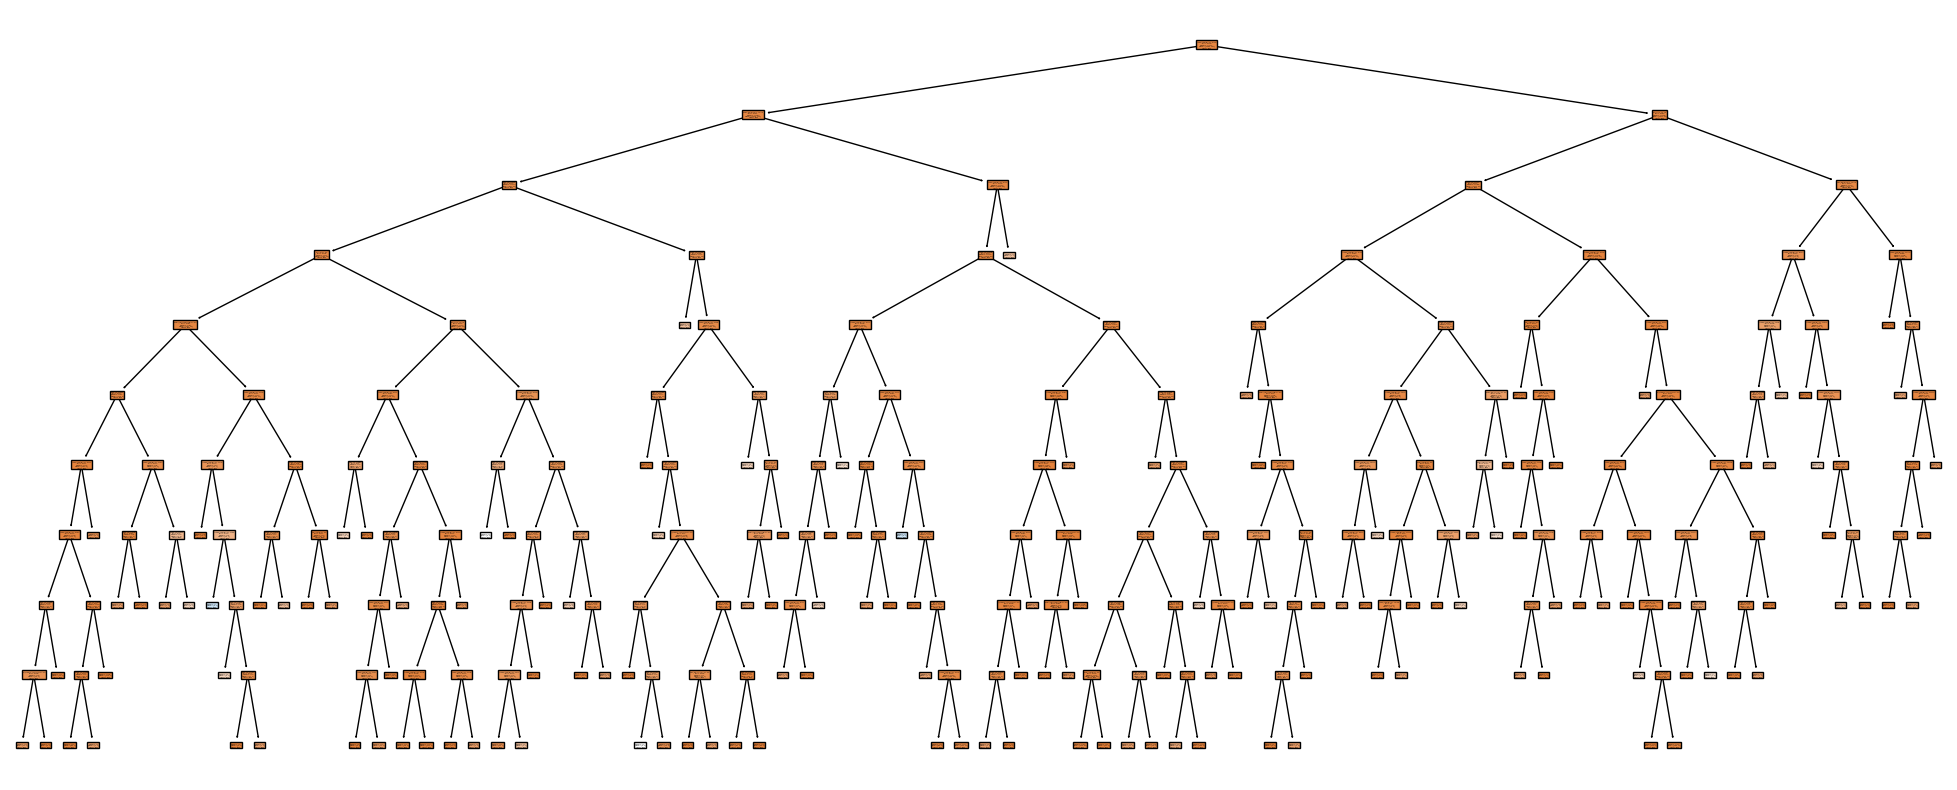

In [27]:
plt.figure(figsize=(25, 10))
plot_tree(clf_nova,
          filled=True,
          class_names=['Mau', 'Bom'],
          feature_names=list(X_train.columns));

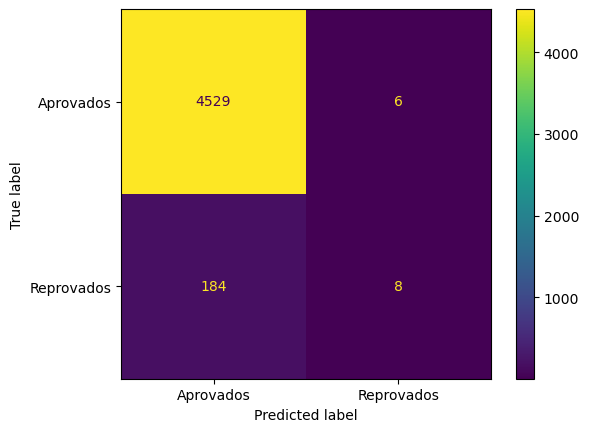

In [28]:
ConfusionMatrixDisplay.from_estimator(clf_nova, X_train, y_train, display_labels=['Aprovados', 'Reprovados']);

In [29]:
y_chapeu_treino_nova = clf_nova.predict(X_train)
accuracy_score(y_train, y_chapeu_treino_nova)

0.9598053733869262

In [30]:
((184+8)/(4529+6+184+8))*100

4.061772794584303

4,1% dos proponentes foram classificados como "mau" nesse novo modelo de predição.

In [31]:
# 5
# Mudando o status de todos os clientes para bons, removendo o "True" em nossa variável target
y_train_aprovados = y_train.apply(lambda x: False)

y_test_aprovados = y_test.apply(lambda x: False)

# Criando uma nova árvore com as últimas especificações
clf_aprovados = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)
clf_aprovados.fit(X_train, y_train_aprovados)

# Calculando a acurácia e mostrando na tela
y_chapeu_aprovados = clf_aprovados.predict(X_test)

acuracia_aprovados = accuracy_score(y_test_aprovados, y_chapeu_aprovados)*100

print(f'A acurácia classificando tudo como "Aprovado" é de {acuracia_aprovados:.1f}%')

A acurácia classificando tudo como "Aprovado" é de 100.0%


Era esperado esse resultado, uma vez que todos os resultados da variável target foram igualados. Esse último modelo tem acurácia de 100%, porém não é recomendado.